# Homework 1

This homework should be submitted as one notebook. When completed, please rename the notebook before sending as follows: *hw1_\<lastname\>_\<firstname\>.ipynb* (example: *hw1_Bond_James.ipynb*).

# Part 1: Differentiation

Since it easy to google every task please please please try to understand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. A good way to derive solutions for these tasks is to derive it for single elements and then generalize to the resulting matrix/vector.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[3](http://cal.cs.illinois.edu/~johannes/research/matrix%20calculus.pdf)

## ex. 1 *[0.5 points]*

Scalar w.r.t. vector:
$$  
y = c^Tx,  \quad x \in \mathbb{R}^N 
$$

## Solution

As we know, derivative of a scalar function w.r.t. vector is a gradient vector $({\frac{\partial f(x)}{x_1}, ..., \frac{\partial f(x)}{x_1}})^T$. Basically, it is just an inner product of the vectors, which can be derived from the table of derivatives:
$$
\frac{\partial{y}}{\partial{x}} = 
\frac{\langle c, x \rangle}{\partial{x}} = c.
$$ 

The same answer is clear if we do elementwise differentiation.

## ex. 2 *[0.5 points]*

Vector w.r.t. vector:
$$ y = \sum_{j=1}^{N} cx^T \quad c \in \mathbb{R}^{M} ,x \in \mathbb{R}^{N}, cx^T \in \mathbb{R}^{M \times N} $$ 

## Solution

As we know, a derivative of a vector w.r.t. vector is a matrix of all derivatives combinations (Jacobian):

$$
\frac{\partial{y}}{\partial{x}} = 
\partial \begin{pmatrix}
c_1 \sum_{i = 1}^{N} x_i \\.\\.\\.\\ c_M \sum_{i = 1}^{N} x_i
\end{pmatrix} / \partial x.
$$

Let's see what do we have elementwise:
$$
\frac{\partial{y_i}}{\partial{x_j}} = 
\frac{\partial c_i \sum_{i = 1}^{N} x_i}{\partial x_j} = c_i.
$$

Thus, for every row in the resulting matrix we'll get a constant row $\left( \frac{\partial{y}}{\partial{x}} \right)_{(i)} = c_i 1_M$, where $1_M$ is a vector of ones.

## ex. 3 *[1 points]*

Vector w.r.t. vector:
$$  
y = x x^T x , x \in \mathbb{R}^{N}
$$

## Solution

Let's solve this task using table of derivatives and derivative of a product formula:
$$
\frac{\partial{y}}{\partial{x}} =
\frac{\partial{x x^T x}}{\partial{x}} = 
\frac{\partial{x}}{\partial{x}} x^T x  + x \frac{\partial{x^T x}}{\partial{x}} = 
x^T x I + 2 x x^T.
$$

## ex. 4 *[1 points]*

Derivatives for the parameters of the Dense layer:

***Given :***  $$Y = XW, Y \in \mathbb{R}^{N \times OUT}, X \in \mathbb{R}^{N \times IN}, W \in \mathbb{R}^{IN \times OUT} $$ 

The derivative of the hypothetic loss function w.r.t. to $Y$ is known: $\Delta Y  \in \mathbb{R}^{N \times OUT}$

***Task :*** Please, derive the gradients of the loss w.r.t the weight matrix $W$: $\Delta W  \in \mathbb{R}^{IN \times OUT}$. Use the chain rule. First, please, derive each element of the $\Delta W$, then generalize to the matrix form.
 
Useful link: http://cs231n.stanford.edu/vecDerivs.pdf


## Solution

First of all, let's denote loss function as $L$ see what do we have by chain rule:
$$
\Delta W = 
\frac{\partial L}{\partial W} =
\frac{\partial L}{\partial Y} \frac{\partial Y}{\partial W}.
$$
We see that given a scalar loss $L$, matrices $Y$ and $W$, we need to multiply matrix $\frac{\partial L}{\partial Y}$ by $4d$ tensor Jacobian $\frac{\partial Y}{\partial W}$. This is not just hard to derive on paper, but it is completely inappropriate to store the whole tensor $\frac{\partial Y}{\partial W}$ which has ${N \times IN \times OUT^2}$ elements.

Let's study the problem elementwise:
$$
\Delta W_{k n} = 
\frac{\partial L}{\partial W_{k n}} =
\frac{\partial L}{\partial Y} \frac{\partial Y}{\partial W_{k n}} = 
\sum_i \sum_j \frac{\partial L}{\partial Y_{i j}} \frac{\partial Y_{i j}}{\partial W_{k n}}.
$$

Since $Y_{ij} = \sum_{d = 1}^{IN} X_{id} W_{dj}$, then it's clear (just by taking derivative of the mentioned sum) that in the expression $\frac{\partial Y_{i j}}{\partial W_{kn}}$ we always will have zeros unless $j \neq n$, so:

$$
\sum_i \sum_j \frac{\partial L}{\partial Y_{i j}} \frac{\partial Y_{i j}}{\partial W_{k n}} = 
\sum_i \frac{\partial L}{\partial Y_{i n}} \frac{\partial Y_{i n}}{\partial W_{k n}} = 
\sum_i \frac{\partial L}{\partial Y_{i n}} X_{i k} = 
\sum_i X^T_{k i} \frac{\partial L}{\partial Y_{i n}}= 
\sum_i X^T_{k i} \Delta Y_{i n} = 
\langle X^T_{(k)}, \Delta Y^{(n)} \rangle = \Delta W_{k n}.
$$

Now let's study what we've just computed. The k-th n-th element of the matrix $\Delta W$ is a scalar product of the k-th row of $X^T$ and n-th column of the $\Delta Y$, which is exactly the definition of the matrix product of $X^T$ and $\Delta Y$, so we immideately derive the answer:

$$
\boxed{\Delta W = X^T \Delta Y}
$$

# Part 2: Modules

In this part you need to implement the modules of your neural network in NumPy.

In [432]:
import numpy as np

**Module** is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments.

In [433]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box) 
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`: 
        
        output = module.forward(input)
    
    The module should be able to perform a backward pass: to differentiate the `forward` function. 
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule. 
    
        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True
    
    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.
        
        This includes 
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput
    

    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.
        
        Make sure to both store the data in `output` field and return it. 
        """
        
        # The easiest case:
            
        # self.output = input 
        # return self.output
        
        pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input. 
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.
        
        The shape of `gradInput` is always the same as the shape of `input`.
        
        Make sure to both store the gradients in `gradInput` field and return it.
        """
        
        # The easiest case:
        
        # self.gradInput = gradOutput 
        # return self.gradInput
        
        pass   
    
    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        """
        pass
    
    def zeroGradParameters(self): 
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass
        
    def getParameters(self):
        """
        Returns a list with its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
        
    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
    
    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = True
    
    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = False
    
    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Module"

# Sequential container *[0.5 pts]*

**Define** a forward and backward pass procedures.

In [434]:
class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially. 
         
         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`. 
    """
    
    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:
        
            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})   
            
            
        Just write a little loop.
        """        
        # Your code goes here. ################################################
        self.inputs = [input]
        for i, module in enumerate(self.modules):
            self.inputs.append(module.forward(self.inputs[-1]))
        self.output = self.inputs[-1]
        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:
            
            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)   
            gradInput = module[0].backward(input, g_1)   
             
             
        !!!
                
        To ech module you need to provide the input, module saw while forward pass, 
        it is used while computing gradients. 
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass) 
        and NOT `input` to this Sequential module. 
        
        !!!
        
        """
        # Your code goes here. ################################################
        grads = [gradOutput]
        for i, module in enumerate(self.modules):
            grads.append(self.modules[-1 - i].backward(self.inputs[-1 - i - 1], grads[-1]))
            
        self.gradInput = grads[-1]
        return self.gradInput
      

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()
    
    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
        return [x.getParameters() for x in self.modules]
    
    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        return [x.getGradParameters() for x in self.modules]
    
    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)
    
    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()
    
    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

# Layers

You need to implement everything in this part and make sure the code passes all tests. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note

* It is **strongly suggested to use vectorized operations on numpy arrays!** Avoid `for` loops whenever possible. It's very inefficient and might make your networks in Parts 3 and 4 training forever.

* Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling. (e.g., `np.add(b,c,out = a)` instead of `a = b + c`)

## 1. Linear transform layer  *[0.5 pts]*
Also known as dense layer, fully-connected layer, FC-layer, InnerProductLayer (in caffe), affine transform
- input:   **`batch_size x n_feats1`**
- output: **`batch_size x n_feats2`**

In [435]:
class Linear(Module):
    """
    A module which applies a linear transformation 
    A common name is fully-connected layer, InnerProductLayer in caffe. 
    
    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()
       
        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        # self.output = ...
        self.output = np.dot(input, self.W.T) + self.b
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = np.dot(gradOutput, self.W)
        
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        # self.gradW = ...
        # self.gradb = ...
        self.gradW = np.dot(gradOutput.T, input)
        self.gradb = gradOutput.sum(axis=0)
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q

## 2. SoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{softmax}(x)_i = \frac{\exp x_i} {\sum_j \exp x_j}$

Recall that $\text{softmax}(x) == \text{softmax}(x - \text{const})$. It makes possible to avoid computing exp() from large argument.

In [436]:
a = np.ones((3, 3))
for row in a:
    print(len(row))
    


a / np.diag(np.array([[1, 1, 1], [1, 2, 1], [1, 1, 3]]))

3
3
3


array([[1.        , 0.5       , 0.33333333],
       [1.        , 0.5       , 0.33333333],
       [1.        , 0.5       , 0.33333333]])

In [437]:
from scipy.special import softmax

class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        # self.output = ...
        input -= np.max(input, axis=1).reshape(-1, 1)
        denominator = np.sum(np.exp(input), axis=1).reshape(-1, 1)
        self.output = np.exp(input) / denominator
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        sftmx = self.output
#         batch_size, n_feats = input.shape
#         self.gradInput = np.stack([np.dot(gradOutput[i], np.diag(sftmx[i]) - np.outer(sftmx[i], sftmx[i].T)) 
#                                    for i in range(batch_size)])
        
        self.gradInput = gradOutput * sftmx - (gradOutput * sftmx).sum(axis=1).reshape(-1, 1) * sftmx
        return self.gradInput
    
    def __repr__(self):
        return "SoftMax"

## 3. LogSoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{logsoftmax}(x)_i = \log\text{softmax}(x)_i = x_i - \log {\sum_j \exp x_j}$

The main goal of this layer is to be used in computation of log-likelihood loss.

In [438]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()
    
    def updateOutput(self, input):
        # start with normalization for numerical stability
        # self.output = ...
        input -= np.max(input)
        self.denominator = np.sum(np.exp(input), axis=1).reshape(-1, 1)
        self.output = input - np.log(self.denominator)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
#         batch_size, n_feats = input.shape
#         input = np.exp(input - np.max(input))
#         self.gradInput = np.stack([np.dot(gradOutput[i], np.eye(n_feats) - sftmx[i]) for i in range(batch_size)])
        input -= np.max(input, axis=1).reshape(-1, 1)
        input_exp = np.exp(input)
        sftmx = input_exp / input_exp.sum(axis=1).reshape(-1, 1)
        self.gradInput = gradOutput - gradOutput.sum(axis=1).reshape(-1, 1) * sftmx
        return self.gradInput
    
    def __repr__(self):
        return "LogSoftMax"

## 4. Batch normalization *[1 pts]*
One of the most significant recent ideas that impacted NNs a lot is [**Batch normalization**](http://arxiv.org/abs/1502.03167). The idea is simple, yet effective: the features should be whitened ($mean = 0$, $std = 1$) all the way through NN. This improves the convergence for deep models letting it train them for days but not weeks. **You are** to implement the first part of the layer: features normalization. The second part (`ChannelwiseScaling` layer) is implemented below.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

The layer should work as follows. While training (`self.training == True`) it transforms input as $$y = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$
where $\mu$ and $\sigma$ - mean and variance of feature values in **batch** and $\epsilon$ is just a small number for numericall stability. Also during training, layer should maintain exponential moving average values for mean and variance: 
```
    self.moving_mean = self.moving_mean * alpha + batch_mean * (1 - alpha)
    self.moving_variance = self.moving_variance * alpha + batch_variance * (1 - alpha)
```
During testing (`self.training == False`) the layer normalizes input using moving_mean and moving_variance. 

Note that decomposition of batch normalization on normalization itself and channelwise scaling here is just a common **implementation** choice. In general "batch normalization" always assumes normalization + scaling.

**Hint:** to implement the gradients, you can derive yourself or refer to the original paper; [this guide](https://kevinzakka.github.io/2016/09/14/batch_normalization/) might also be useful.

In [439]:
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = None 
        self.moving_variance = None
        
    def updateOutput(self, input):         
        if self.training:
            batch_mean = np.mean(input, axis=0, keepdims=True)
            centered_input = input - batch_mean
            batch_variance = np.var(input, axis=0, keepdims=True)
            
            if self.moving_mean is None:
                self.moving_mean = batch_mean
            else:
                self.moving_mean = self.moving_mean * self.alpha + batch_mean * (1 - self.alpha)
            
            if self.moving_variance is None:
                self.moving_variance = batch_variance
            else:
                self.moving_variance = self.moving_variance * self.alpha + batch_variance * (1 - self.alpha)
            
            self.output = centered_input / np.sqrt(batch_variance + self.EPS)
        else:
            if self.moving_mean is None:
                self.output = input
            else:
                self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
            
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        batch_size, n_feats = input.shape
        batch_mean = np.mean(input, axis=0, keepdims=True)
        batch_variance = np.var(input, axis=0, keepdims=True)
        base_denom = np.sqrt(batch_variance + self.EPS)
#         left = np.eye(batch_size, n_feats) * (1 - 1 / batch_size) / np.sqrt(batch_variance + self.EPS)
#         right = np.dot((input - batch_mean).T, (input - batch_mean)) / \
#                 (batch_size * np.power(np.sqrt(batch_variance + self.EPS), 3))
        self.gradInput = (batch_size * gradOutput - gradOutput.sum(axis=0) - \
                          self.output * (gradOutput * self.output).sum(axis=0)) / \
                         (batch_size * base_denom)
        return self.gradInput
    
    def __repr__(self):
        return "BatchNormalization"

In [440]:
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)
        
        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output
        
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)
    
    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)
        
    def getParameters(self):
        return [self.gamma, self.beta]
    
    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]
    
    def __repr__(self):
        return "ChannelwiseScaling"

Practical notes. If BatchNormalization is placed after a linear transformation layer (including dense layer, convolutions, channelwise scaling) that implements function like `y = weight * x + bias`, than bias adding become useless and could be omitted since its effect will be discarded while batch mean subtraction. If BatchNormalization (followed by `ChannelwiseScaling`) is placed before a layer that propagates scale (including ReLU, LeakyReLU) followed by any linear transformation layer than parameter `gamma` in `ChannelwiseScaling` could be freezed since it could be absorbed into the linear transformation layer.

## 5. Dropout *[0.5 pts]*
Implement [**dropout**](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). The idea and implementation is really simple: just multiply the input by $Bernoulli(p)$ mask. Here $p$ is probability of an element to be zeroed.

This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons.

While training (`self.training == True`) it should sample a mask on each iteration (for every batch), zero out elements and multiply elements by $1 / (1 - p)$. The latter is needed for keeping mean values of features close to mean values which will be in test mode. When testing this module should implement identity transform i.e. `self.output = input`.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

In [441]:
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        
        self.p = p
        self.mask = None
        
    def updateOutput(self, input):
        if self.training:
            self.mask = np.random.binomial(1, 1 - self.p, size=input.shape) / (1 - self.p)
            self.output = input *  self.mask
        else:
            self.output = input

        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = gradOutput * self.mask
        return self.gradInput 
        
    def __repr__(self):
        return "Dropout"

# Activation functions

Here's the complete example for the **Rectified Linear Unit** non-linearity (aka **ReLU**): 

In [442]:
a = np.array([[-1, 1], [0, 2]])
a * (a > 0)

array([[0, 1],
       [0, 2]])

In [443]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def updateOutput(self, input):
        # self.output = ...
        self.output = input * (input > 0)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = gradOutput * (input > 0)
        return self.gradInput
    
    def __repr__(self):
        return "ReLU"

## 6. Leaky ReLU *[0.5 pts]*
Implement [**Leaky Rectified Linear Unit**](http://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29%23Leaky_ReLUs). Expriment with slope. 

In [444]:
a = np.array([[1, 2], [3, 4]])
np.ones(a.shape)

array([[1., 1.],
       [1., 1.]])

In [445]:
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()
            
        self.slope = slope
        
    def updateOutput(self, input):
        # self.output = ...
        
        self.output = input * self.slope * (input <= 0) + input * (input > 0)
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = gradOutput * self.slope * (input <= 0) + gradOutput * (input > 0)
        return self.gradInput
    
    def __repr__(self):
        return "LeakyReLU"

## 7. ELU *[0.5 pts]*
Implement [**Exponential Linear Units**](http://arxiv.org/abs/1511.07289) activations.

In [446]:
class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()
        
        self.alpha = alpha
        
    def updateOutput(self, input):
        # self.output = ...
        
        self.output = self.alpha * (np.exp(input) - np.ones(input.shape)) * (input <= 0) + \
                      input * (input > 0)
        
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        
        self.gradInput = gradOutput * self.alpha * np.exp(input) * (input <= 0) + \
                         gradOutput * (input > 0)
        
        return self.gradInput
    
    def __repr__(self):
        return "ELU"

## 8. SoftPlus *[0.5 pts]*
Implement [**SoftPlus**](https://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29) activations. Look, how they look a lot like ReLU.

In [447]:
import scipy.special

class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()
    
    def updateOutput(self, input):
        # self.output = ...
        self.output = np.log(1 + np.exp(input))
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # self.gradInput = ...
        self.gradInput = gradOutput / (1 + np.exp(-input))
        return self.gradInput
    
    def __repr__(self):
        return "SoftPlus"

# Criterions

Criterions are used to score the models answers. 

In [448]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None
        
    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function 
            associated to the criterion and return the result.
            
            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result. 

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput   

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Criterion"

The **MSECriterion**, which is basic L2 norm usually used for regression, is implemented here for you.
- input:   **`batch_size x n_feats`**
- target: **`batch_size x n_feats`**
- output: **scalar**

In [449]:
class MSECriterion(Criterion):
    def __init__(self):
        super(MSECriterion, self).__init__()
        
    def updateOutput(self, input, target):   
        self.output = np.sum(np.power(input - target, 2)) / input.shape[0]
        return self.output 
 
    def updateGradInput(self, input, target):
        self.gradInput  = (input - target) * 2 / input.shape[0]
        return self.gradInput

    def __repr__(self):
        return "MSECriterion"

## 9. Negative LogLikelihood criterion (numerically unstable) *[0.5 pts]*
You task is to implement the **ClassNLLCriterion**. It should implement [multiclass log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss). Nevertheless there is a sum over `y` (target) in that formula, 
remember that targets are one-hot encoded. This fact simplifies the computations a lot. Note, that criterions are the only places, where you divide by batch size. Also there is a small hack with adding small number to probabilities to avoid computing log(0).
- input:   **`batch_size x n_feats`** - probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**



In [450]:
np.sum(np.ones((2, 2)))

4.0

In [451]:
class ClassNLLCriterionUnstable(Criterion):
    EPS = 1e-15
    def __init__(self):
        a = super(ClassNLLCriterionUnstable, self)
        super(ClassNLLCriterionUnstable, self).__init__()
        
    def updateOutput(self, input, target): 
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
        
        # self.output = ...
        self.output = -np.sum(np.log(input_clamp) * target) / input.shape[0]
        return self.output

    def updateGradInput(self, input, target):
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
                
        # self.gradInput = ...
        self.gradInput = -target / input_clamp / input.shape[0]
        
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterionUnstable"

## 10. Negative LogLikelihood criterion (numerically stable) *[0.5 pts]*
- input:   **`batch_size x n_feats`** - log probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**

Task is similar to the previous one, but now the criterion input is the output of log-softmax layer. This decomposition allows us to avoid problems with computation of forward and backward of log().

In [452]:
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target): 
        # self.output = ...
        self.output = -np.sum(input * target) / input.shape[0]
        return self.output

    def updateGradInput(self, input, target):
        # self.gradInput = ...
        self.gradInput = -target / input.shape[0]
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"

# Optimizers

### SGD optimizer with momentum
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate` and `momentum`)
- `state` - dict with optimizator state (used to save accumulated gradients)

In [453]:
def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            
            current_var -= old_grad
            var_index += 1     

## 12. [Adam](https://arxiv.org/pdf/1412.6980.pdf) optimizer *[0.5 pts]*
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate`, `beta1`, `beta2`, `epsilon`)
- `state` - dict with optimizator state (used to save 1st and 2nd moment for vars)

Formulas for optimizer:

Current step learning rate: $$\text{lr}_t = \text{learning_rate} * \frac{\sqrt{1-\beta_2^t}} {1-\beta_1^t}$$
First moment of var: $$\mu_t = \beta_1 * \mu_{t-1} + (1 - \beta_1)*g$$ 
Second moment of var: $$v_t = \beta_2 * v_{t-1} + (1 - \beta_2)*g*g$$
New values of var: $$\text{variable} = \text{variable} - \text{lr}_t * \frac{m_t}{\sqrt{v_t} + \epsilon}$$

In [454]:
def adam_optimizer(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('m', {})  # first moment vars
    state.setdefault('v', {})  # second moment vars
    state.setdefault('t', 0)   # timestamp
    state['t'] += 1
    for k in ['learning_rate', 'beta1', 'beta2', 'epsilon']:
        assert k in config, config.keys()
    
    var_index = 0 
    lr_t = config['learning_rate'] * np.sqrt(1 - config['beta2']**state['t']) / (1 - config['beta1']**state['t'])
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            var_first_moment = state['m'].setdefault(var_index, np.zeros_like(current_grad))
            var_second_moment = state['v'].setdefault(var_index, np.zeros_like(current_grad))
            
            # <YOUR CODE> #######################################
            # update `current_var_first_moment`, `var_second_moment` and `current_var` values
            curr_var_first_moment = config['beta1'] * var_first_moment + (1 - config['beta1']) * current_grad
            curr_var_second_moment = config['beta2'] * var_second_moment + (1 - config['beta2']) * current_grad * current_grad
            current_var -= lr_t * curr_var_first_moment / (np.sqrt(curr_var_second_moment) + config['epsilon'])
            np.add(np.zeros_like(curr_var_first_moment), curr_var_first_moment, state['m'].get(var_index))
            np.add(np.zeros_like(curr_var_second_moment), curr_var_second_moment, state['v'].get(var_index))

            # #####################################
            
            # small checks that you've updated the state; use np.add for rewriting np.arrays values
            assert var_first_moment is state['m'].get(var_index)
            assert var_second_moment is state['v'].get(var_index)
            var_index += 1


## Testing the modules

Please run the following code provided for you to check the correctness of the implementations. It is strongly advised to run this code frequently while completing the homework.

You don't need to modify the cells in this section.

In [455]:
from test_modules import make_tester
import unittest

In [456]:
TestLayers = make_tester({
    'Sequential': Sequential,
    'Linear': Linear,
    'SoftMax': SoftMax,
    'LogSoftMax': LogSoftMax,
    'BatchNormalization': BatchNormalization,
    'ChannelwiseScaling': ChannelwiseScaling,
    'Dropout': Dropout,
    'ReLU': ReLU,
    'LeakyReLU': LeakyReLU,
    'ELU': ELU,
    'SoftPlus': SoftPlus,
    'ClassNLLCriterion': ClassNLLCriterion,
    'ClassNLLCriterionUnstable': ClassNLLCriterionUnstable,
    'adam_optimizer': adam_optimizer,
})

In [457]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayers)

In [458]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_BatchNormalization (test_modules.make_tester.<locals>._tester) ... ok
test_ClassNLLCriterion (test_modules.make_tester.<locals>._tester) ... ok
test_ClassNLLCriterionUnstable (test_modules.make_tester.<locals>._tester) ... ok
test_Dropout (test_modules.make_tester.<locals>._tester) ... ok
test_ELU (test_modules.make_tester.<locals>._tester) ... ok
test_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_Linear (test_modules.make_tester.<locals>._tester) ... ok
test_LogSoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_BatchNorm_ChannelwiseScaling (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_Linear_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_SoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_SoftPlus (test_modules.make_tester.<locals>._tester) ... ok
test_adam_optimizer (test_modules.make_tester.<locals>._tester) ... ok

--------------------------------------------------------------------

<unittest.runner.TextTestResult run=13 errors=0 failures=0>

# Part 3: Training your first network

In [459]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

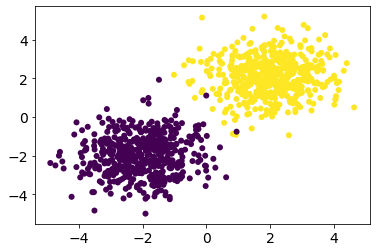

In [460]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0], X[:,1], c=Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [461]:
# net = Sequential()
# net.add(Linear(2, 2))
# net.add(LogSoftMax())

# criterion = ClassNLLCriterion()

# print(net)

# Test something like this then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())
criterion = ClassNLLCriterion()
print(net)

Linear 2 -> 4
ReLU
Linear 4 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [462]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [463]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

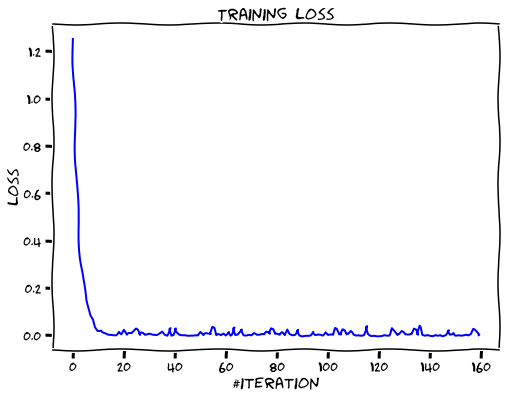

Current loss: 0.001349


In [464]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)     
        
        loss_history.append(loss)

    # Visualize
    with plt.xkcd():
        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))

        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We will be using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [465]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [466]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [467]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [468]:
import time
from tqdm import tqdm

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.labelsize'] = 16
#plt.xkcd()

In [469]:
def plot_activations(loss_history, test_loss, models_labels):
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Activation functions', fontsize=22)
    axs = axs.ravel()
    for i, label in enumerate(models_labels):
        axs[0].plot(loss_history[i], label=label, alpha=0.7)
        axs[1].plot(test_loss[i], label=label, alpha=0.7)
    for i, ax in enumerate(axs):
        ax.set_xlabel("#iteration")
        ax.set_ylabel("loss")
        ax.set_yscale('log')
        ax.legend()
        ax.grid()
    axs[0].set_title('Train loss')
    axs[1].set_title('Test loss')
    plt.show()
    

def plot_batch_norm(loss_history, models_labels):
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    fig.suptitle("Training loss with and without batch norm", fontsize=22)
    fig.tight_layout(pad=5.0)
    axs = axs.ravel()
    for i, ax in enumerate(axs):
        ax.plot(loss_history[2 * i], label='no batch norm', alpha=0.7)
        ax.plot(loss_history[2 * i + 1], label='batch norm', alpha=0.7)
        ax.set_title(f'activation: {models_labels[2 * i]}')
        ax.set_xlabel('#iteration')
        ax.set_ylabel('loss')
        ax.set_yscale('log')
        ax.legend()
        ax.grid()
    plt.show()
    
    
def plot_optimizers(loss_history, test_loss, models_labels):
    # doubles code, I leave for further refactoring
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Optimizers', fontsize=22)
    axs = axs.ravel()
    for i, label in enumerate(models_labels):
        axs[0].plot(loss_history[i], label=label, alpha=0.7)
        axs[1].plot(test_loss[i], label=label, alpha=0.7)
    for i, ax in enumerate(axs):
        ax.set_xlabel("#iteration")
        ax.set_ylabel("loss")
        ax.set_yscale('log')
        ax.legend()
        ax.grid()
    axs[0].set_title('Train loss')
    axs[1].set_title('Test loss')
    plt.show()
    
    
def plot_dropout(loss_history, test_loss, models_labels):
    # doubles code, I leave for further refactoring
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Dropout', fontsize=22)
    axs = axs.ravel()
    for i, label in enumerate(models_labels):
        axs[0].plot(loss_history[i], label=label, alpha=0.7)
        axs[1].plot(test_loss[i], label=label, alpha=0.7)
    for i, ax in enumerate(axs):
        ax.set_xlabel("#iteration")
        ax.set_ylabel("loss")
        ax.set_yscale('log')
        ax.legend()
        ax.grid()
    axs[0].set_title('Train loss')
    axs[1].set_title('Test loss')
    plt.show()


def plot_result(loss_history, test_loss, models_labels, mode='activations'):
    if mode == 'activations':
        plot_activations(loss_history, test_loss, models_labels)
    elif mode == 'batch_norm':
        plot_batch_norm(loss_history, models_labels)
    elif mode == 'optimizers':
        plot_optimizers(loss_history, test_loss, models_labels)
    elif mode == 'dropout':
        plot_dropout(loss_history, test_loss, models_labels)
    mean_losses = [np.array(loss_history[i][-11: -1]).mean() for i in range(len(loss_history))]    
    for i, mean_loss in enumerate(mean_losses):
        print(f'Last 10 iterations mean loss for {models_labels[i]} model: {mean_loss:.4f}')

        
def train_models_set(models_set, models_labels, criterion, X_train, Y_train, X_test, Y_test, optimizer=sgd_momentum, n_epoch=30, batch_size=128, mode='activations'):
    loss_history = [[] for model in models_set]
    test_loss = [[] for model in models_set]
    if optimizer == sgd_momentum:
        optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
    elif optimizer == adam_optimizer:
        optimizer_config = {'learning_rate' : 1e-4, 'beta1' : 0.9, 'beta2' : 0.999, 'epsilon' : 1e-7}
    optimizer_states = [{} for model in models_set]
    
    training_time = [0 for model in models_set]
    
    smooth_count = 0

    for i in tqdm(range(n_epoch)):
        display.clear_output(wait=True)
        for x_batch, y_batch in get_batches((X_train, Y_train), batch_size):
            smooth_count += 1
            for i, model in enumerate(models_set):
                batch_start = time.time()
                model.zeroGradParameters()

                # Forward
                predictions = model.forward(x_batch)
                loss = criterion.forward(predictions, y_batch)

                # Backward
                dp = criterion.backward(predictions, y_batch)
                model.backward(x_batch, dp)

                # Update weights
                optimizer(model.getParameters(), 
                             model.getGradParameters(), 
                             optimizer_config,
                             optimizer_states[i])      

                loss_history[i].append(loss)
                
                batch_end = time.time()
                training_time[i] += (batch_end - batch_start)
        for i, model in enumerate(models_set):
            predictions = model.forward(X_test)
            loss = criterion.forward(predictions, Y_test)
            test_loss[i].append(loss)

    return loss_history, test_loss, training_time

      
def build_models_set(activations, n_feats=784, n_targets=10, mode='activations'):
    models = []
    models_labels = []
    if mode == 'activations':
        for func in activations:
            net = Sequential()
            net.add(Linear(n_feats, n_feats // 4))
            net.add(func())
            net.add(Linear(n_feats // 4, n_targets))
            net.add(LogSoftMax())
            models.append(net)
            models_labels.append(func().__repr__())
    elif mode == 'batch_norm':  # yes I know this part can be implemented better
        for func in activations:
            net = Sequential()
            net.add(Linear(n_feats, n_feats // 4))
            net.add(func())
            net.add(Linear(n_feats // 4, n_targets))
            net.add(LogSoftMax())
            models.append(net)
            models_labels.append(func().__repr__())
            
            net = Sequential()
            net.add(Linear(n_feats, n_feats // 4))
            net.add(BatchNormalization())
            net.add(ChannelwiseScaling())
            net.add(func())
            net.add(Linear(n_feats // 4, n_targets))
            net.add(LogSoftMax())
            models.append(net)
            models_labels.append(func().__repr__() + ' + batch_norm')
    elif mode == 'dropout':
        func = activations[0]
        net = Sequential()
        net.add(Linear(n_feats, n_feats // 2))
        net.add(func())
        net.add(Linear(n_feats // 2, n_targets))
        net.add(LogSoftMax())
        models.append(net)
        models_labels.append(func().__repr__())
        
        net = Sequential()
        net.add(Linear(n_feats, n_feats // 2))
        net.add(Dropout(p=0.4))
        net.add(func())
        net.add(Linear(n_feats // 2, n_targets))
        net.add(LogSoftMax())
        models.append(net)
        models_labels.append(func().__repr__() + ' dropout')
    return models, models_labels


def smooth_loss(loss_history, smooth=50):
    return [np.convolve(np.array(history), np.ones(smooth) / smooth, mode='valid') for history in loss_history]
        

#### to avoid messy plots, all train losses are smoothed with moving average for 50 elements

## Activations functions comparison



100%|██████████| 30/30 [05:27<00:00, 10.93s/it]


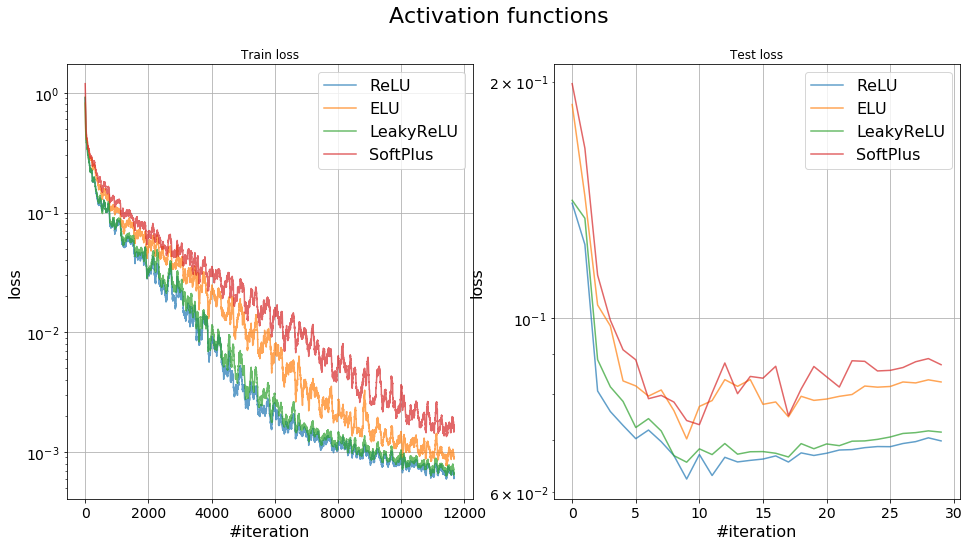

Last 10 iterations mean loss for ReLU model: 0.0006
Last 10 iterations mean loss for ELU model: 0.0009
Last 10 iterations mean loss for LeakyReLU model: 0.0007
Last 10 iterations mean loss for SoftPlus model: 0.0015


ReLU model trainig time: 59.6 sec
ELU model trainig time: 89.6 sec
LeakyReLU model trainig time: 65.3 sec
SoftPlus model trainig time: 93.3 sec


In [66]:
activations = [ReLU, ELU, LeakyReLU, SoftPlus]
models_set, models_labels = build_models_set(activations)
criterion = ClassNLLCriterion()

loss_history, test_loss, training_time = train_models_set(models_set, models_labels, criterion, 
                                                          X_train, y_train_hot, X_test, y_test_hot)
plot_result(smooth_loss(loss_history), test_loss, models_labels)

print('\n')

for i, tr_time in enumerate(training_time):
    print(f'{models_labels[i]} model trainig time: {training_time[i]:.1f} sec')

### Comments
Basically the only thing I can say here is that ReLU and LeakyReLU show lower loss both on train and test sets in comparison to other activations.

## Batch normalization influence



100%|██████████| 30/30 [12:36<00:00, 25.23s/it]


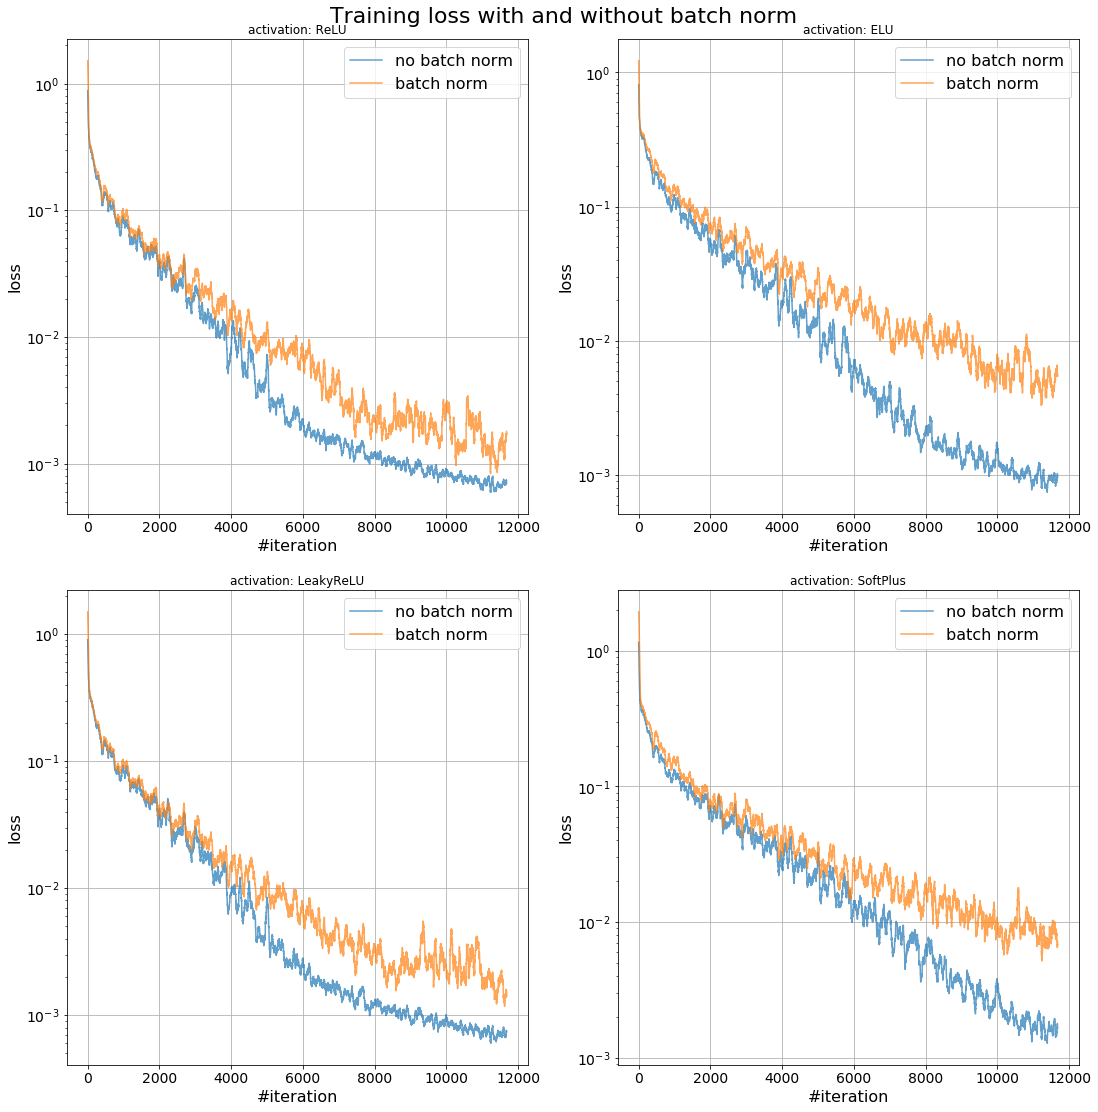

Last 10 iterations mean loss for ReLU model: 0.0007
Last 10 iterations mean loss for ReLU + batch_norm model: 0.0017
Last 10 iterations mean loss for ELU model: 0.0010
Last 10 iterations mean loss for ELU + batch_norm model: 0.0057
Last 10 iterations mean loss for LeakyReLU model: 0.0007
Last 10 iterations mean loss for LeakyReLU + batch_norm model: 0.0015
Last 10 iterations mean loss for SoftPlus model: 0.0017
Last 10 iterations mean loss for SoftPlus + batch_norm model: 0.0067


ReLU model trainig time: 64.0 sec
ReLU + batch_norm model trainig time: 82.4 sec
ELU model trainig time: 92.8 sec
ELU + batch_norm model trainig time: 111.0 sec
LeakyReLU model trainig time: 70.4 sec
LeakyReLU + batch_norm model trainig time: 87.9 sec
SoftPlus model trainig time: 96.4 sec
SoftPlus + batch_norm model trainig time: 113.8 sec


In [69]:
activations = [ReLU, ELU, LeakyReLU, SoftPlus]
models_set, models_labels = build_models_set(activations, mode='batch_norm')
criterion = ClassNLLCriterion()

loss_history, test_loss, training_time = train_models_set(models_set, models_labels, criterion, 
                                                          X_train, y_train_hot, X_test, y_test_hot, mode='batch_norm')
plot_result(smooth_loss(loss_history), test_loss, models_labels, mode='batch_norm')

print('\n')

for i, tr_time in enumerate(training_time):
    print(f'{models_labels[i]} model trainig time: {training_time[i]:.1f} sec')

### Comments
I know that batch norm must show better performance on train set, but it doesn't in my case. Idk why :c

## SGD vs Adam














100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


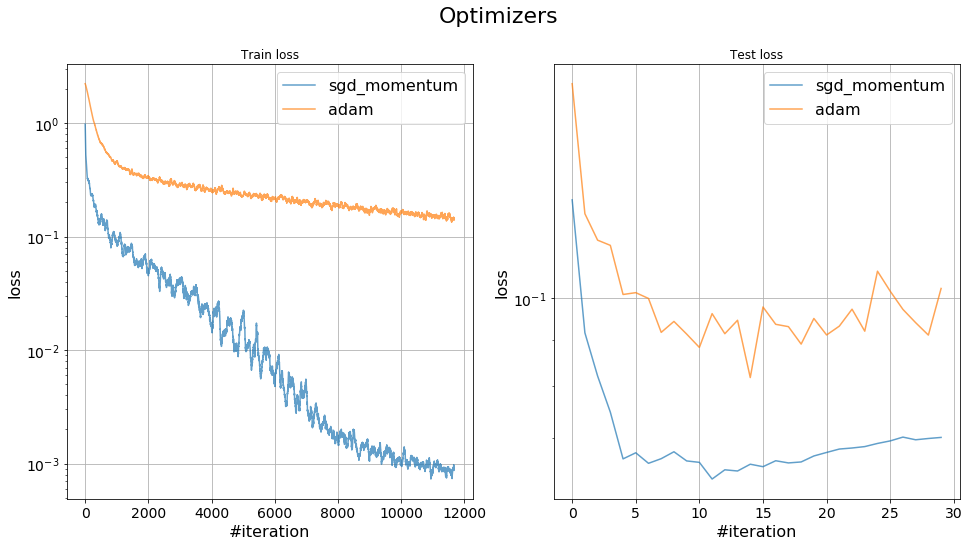

Last 10 iterations mean loss for sgd_momentum model: 0.0009
Last 10 iterations mean loss for adam model: 0.1434


In [470]:
n_feats, n_targets = 784, 10
optimizers = [sgd_momentum, adam_optimizer]
models_labels = ['sgd_momentum', 'adam']
loss_history = []
for opt in optimizers:
    net = Sequential()
    net.add(Linear(n_feats, n_feats // 10))
    net.add(ReLU())
    net.add(Linear(n_feats // 10, n_targets))
    net.add(LogSoftMax())
    models_set = [net]
    loss_history.append(train_models_set(models_set, models_labels, criterion, 
                                         X_train, y_train_hot, X_test, y_test_hot, optimizer=opt)[0][0])
plot_result(smooth_loss(loss_history), test_loss, models_labels, mode='optimizers')

### Comments
I know that as a rule adam must work better. I tried many times to tune parameters, but everytime the picture is like this.

## Dropout influence



100%|██████████| 30/30 [08:37<00:00, 17.25s/it]


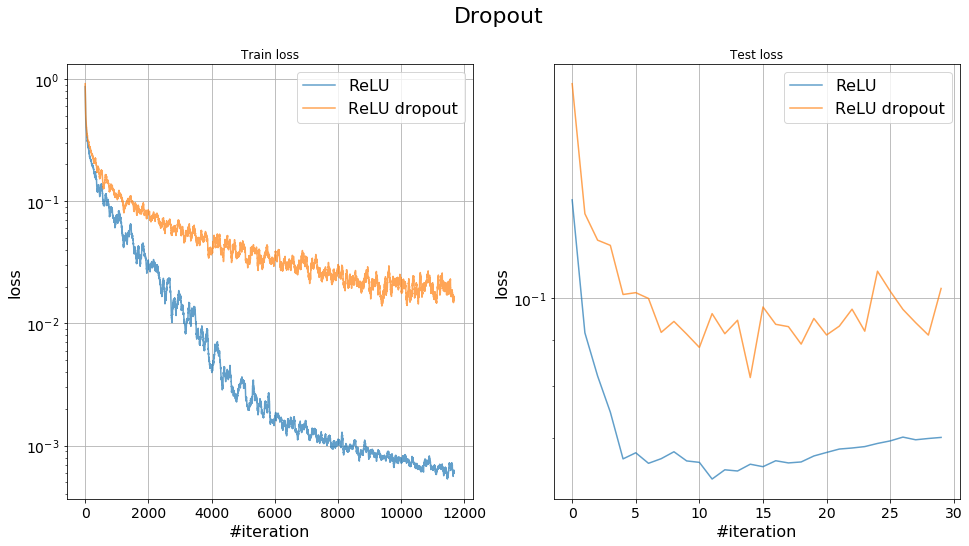

Last 10 iterations mean loss for ReLU model: 0.0006
Last 10 iterations mean loss for ReLU dropout model: 0.0162


No dropout trainig time: 217.3 sec
Dropout trainig time: 276.8 sec


In [75]:
activations = [ReLU]
models_set, models_labels = build_models_set(activations, mode='dropout')
criterion = ClassNLLCriterion()

loss_history, test_loss, training_time = train_models_set(models_set, models_labels, criterion, 
                                                          X_train, y_train_hot, X_test, y_test_hot, mode='dropout')
plot_result(smooth_loss(loss_history), test_loss, models_labels, mode='dropout')

print('\n')

print(f'No dropout trainig time: {training_time[0]:.1f} sec')
print(f'Dropout trainig time: {training_time[1]:.1f} sec')

### Comments
We see that model with dropout takes longer time to learn and perfroms significantly worse on the training set.

-  *[2 pts]* **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
Use an architecture of your choice for the comparison (no need to pick the best optimizer parameters for now). Write your personal opinion on the activation functions, think about computation times too. Plot the loss curves from activation functions comparison on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be informative. 

- *[1 pts]* **Try** inserting `BatchNormalization` (followed by `ChannelwiseScaling`) between `Linear` module and activation functions. For all activation functions, plot versions with and without `BatchNormalization` on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.  Does `BatchNormalization` help?

- *[1 pts]* Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?  

- *[2 pts]* Increase the number of parameters in the network. Try inserting the Dropout layer. Compare the validation performance and the gap between test and validation performances for the two experiments (with and without Dropout). Compare the loss plots. Which one converges slower?


# Part 4: Convolutional neural networks

In the previous part you needed to train a dense, or fully-connected, neural network. This part of the homework is to prepare modules for training a basic convolutional network: `Conv2D`, `Flatten`, `MaxPool2d`. 

Your task is to implement a simple framework for convolutional neural networks training. While convolutional neural networks is a subject of lecture 3, we expect that there are a lot of students who are familiar with the topic.

In order to successfully complete this part, you will have to:

- Implement all the layers below (`Conv2d`, `MaxPool2d`; `Flatten` is already implemented for convenience). Good implementation should pass all the tests in the subsequent cells.
- Train a CNN that has at least one `Conv2d` layer and at least one `MaxPool2d` layer and achieves at least 97% accuracy on MNIST test set.

Feel free to use the code from Part 3 for debugging or as a source of code snippets. 

# Layers for Part 4

## 12. Conv2d *[2 pts]*
- input:   **`batch_size x in_channels x h x w`**
- output: **`batch_size x out_channels x h x w`**

You should implement a layer which works like PyTorch `Conv2d` layer with `stride=1` and zero-padding outside of image using `scipy.signal.correlate` function.

Practical notes:
- While the layer name is "convolution", most of neural network frameworks (including TensorFlow and PyTorch) implement operation that is called [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation#Cross-correlation_of_deterministic_signals) in signal processing theory. So **don't use** `scipy.signal.convolve` since it implements [convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) in terms of signal processing.
- It may be convenient to use `np.pad` or `skimage.util.pad` for zero-padding.
- It's rather ok to implement convolution over 4d array using 2 nested loops: one over batch size dimension and another one over output filters dimension
- Having troubles with understanding how to implement the layer? 
 - Check out e.g. this link on how to make forward pass and to calculate all the gradients: https://towardsdatascience.com/backpropagation-in-a-convolutional-layer-24c8d64d8509
 - May the google be with you

In [418]:
import scipy as sp
import scipy.signal
# import skimage

class Conv2d(Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(Conv2d, self).__init__()
        assert kernel_size % 2 == 1, kernel_size
       
        stdv = 1./np.sqrt(in_channels)
        self.W = np.random.uniform(-stdv, stdv, size = (out_channels, in_channels, kernel_size, kernel_size))
        self.b = np.random.uniform(-stdv, stdv, size=(out_channels,))
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the input array
        # 2. compute convolution using scipy.signal.correlate(... , mode='valid')
        # 3. add bias value
        pad = [[0, 0], [0, 0], [pad_size] * 2, [pad_size] * 2]
        self.output = np.zeros((input.shape[0], self.out_channels, input.shape[2], input.shape[3]))
        input = np.pad(input, pad)
        for img in range(input.shape[0]):
            for out_c in range(self.out_channels):
                self.output[img, out_c, :, :] = scipy.signal.correlate(input[img, :, :, :], 
                                                                       self.W[out_c, :, :, :], mode='valid')
                self.output[img, out_c, :, :] = np.add(self.output[img, out_c, :, :], self.b[out_c])
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the gradOutput
        # 2. compute 'self.gradInput' value using scipy.signal.correlate(... , mode='valid')
        pad = [[0, 0], [0, 0], [pad_size] * 2, [pad_size] * 2]
        gradOutput = np.pad(gradOutput, pad)
        
        # self.gradInput = ...
        self.gradInput = np.zeros_like(input)
        for img in range(input.shape[0]):
            for in_c in range(self.in_channels):
                self.gradInput[img, in_c, :, :] = scipy.signal.correlate(gradOutput[img], 
                                                                          np.flip(self.W[:, in_c, :, :], axis=(2, 1)), mode='valid')
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE #############
        # 1. zero-pad the input
        # 2. compute 'self.gradW' using scipy.signal.correlate(... , mode='valid')
        # 3. compute 'self.gradb' - formulas like in Linear of ChannelwiseScaling layers
        
        # self.gradW = ...
        # self.gradb = ...
        pad = [[0, 0], [0, 0], [pad_size] * 2, [pad_size] * 2]
        input = np.pad(input, pad)
        self.gradW = np.zeros_like(self.W)
        for in_c in range(self.in_channels):
            for out_c in range(self.out_channels):
                self.gradW[out_c, in_c, :, :] = scipy.signal.correlate(input[:, in_c, :, :], 
                                                                       gradOutput[:, out_c, :, :], mode='valid')
        self.gradb = gradOutput.sum(axis=(0, 2, 3))
        pass
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Conv2d %d -> %d' %(s[1],s[0])
        return q

## 13. MaxPool2d *[2 pts]*
- input:   **`batch_size x n_input_channels x h x w`**
- output: **`batch_size x n_output_channels x h // kern_size x w // kern_size`**

You are to implement simplified version of pytorch `MaxPool2d` layer with stride = kernel_size. Please note, that it's not a common case that stride = kernel_size: in AlexNet and ResNet kernel_size for max-pooling was set to 3, while stride was set to 2. We introduce this restriction to make implementation simplier.

Practical notes:
- During forward pass what you need to do is just to reshape the input tensor to `[n, c, h / kern_size, kern_size, w / kern_size, kern_size]`, swap two axes and take maximums over the last two dimensions. Reshape + axes swap is sometimes called space-to-batch transform.
- During backward pass you need to place the gradients in positions of maximal values taken during the forward pass
- In real frameworks the indices of maximums are stored in memory during the forward pass. It is cheaper than to keep the layer input in memory and recompute the maximums. 

**Hint:** `np.put_along_axis` might be useful during backward pass.

In [419]:
class MaxPool2d(Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.gradInput = None
                    
    def updateOutput(self, input):
        batch_size, n_in_channels, input_h, input_w = input.shape
        # your may remove these asserts and implement MaxPool2d with padding
        assert input_h % self.kernel_size == 0  
        assert input_w % self.kernel_size == 0
        
        # YOUR CODE #############################
        # self.output = ...
        # self.max_indices = ...
        self.output = input.reshape(batch_size, n_in_channels, input_h // self.kernel_size, 
                                    self.kernel_size, input_w // self.kernel_size, self.kernel_size)
        self.output = np.swapaxes(self.output, 3, 4)
        self.helper = self.output
        self.output = np.max(self.output, (4, 5))
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # YOUR CODE #############################
        # self.gradInput = ...
        batch_size, n_in_channels, input_h, input_w = input.shape
        self.gradInput = np.zeros_like(self.helper)
        max_mask = np.max(self.helper, axis=(4, 5), keepdims=True)
        self.gradInput += gradOutput[:, :, :, :, None, None] * (self.helper == max_mask)
        self.gradInput = np.swapaxes(self.gradInput, 4, 3)
        self.gradInput = np.reshape(self.gradInput, (input.shape[0], input.shape[1], input_h, input_w))
        
        return self.gradInput
    
    def __repr__(self):
        q = 'MaxPool2d, kern %d, stride %d' %(self.kernel_size, self.kernel_size)
        return q

### Flatten layer
Just reshapes inputs and gradients. It's usually used as proxy layer between Conv2d and Linear.

The layer is already implemented below, you don't need to change it.

In [420]:
class Flatten(Module):
    def __init__(self):
        super(Flatten, self).__init__()
    
    def updateOutput(self, input):
        self.output = input.reshape(len(input), -1)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput.reshape(input.shape)
        return self.gradInput
    
    def __repr__(self):
        return "Flatten"

# Testing your layers

Please run the following cells to check if the implementations are correct (all tests are passed):

In [421]:
a = np.array([np.pi * 5, 3, 1]).max()
a == np.array([np.pi * 5, 3, 1]).max()


True

In [422]:
from test_modules import make_advanced_tester
import unittest

In [423]:
TestLayersAdv = make_advanced_tester({
    'Conv2d': Conv2d,
    'Flatten': Flatten,
    'MaxPool2d': MaxPool2d,
})

In [424]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayersAdv)

In [425]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_Conv2d (test_modules.make_advanced_tester.<locals>._tester) ... ok
test_MaxPool2d (test_modules.make_advanced_tester.<locals>._tester) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.387s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# Training a convolutional network  *[3 pts]*

Here you task is to train a CNN that has at least one `Conv2d` layer and `MaxPool2d` layer which achieves at least 97% accuracy on MNIST **test** set.

**Hint:** Layers implemented in this homework run on CPU, and if the network is too deep, training might last forever, so we suggest to start with smaller networks. This subtask can be solved with a ConvNet having only 3 `Conv2d` layers (or even less) with a small number of channels.

In [426]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [427]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()  # your dataset

In [428]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [429]:
from sklearn.metrics import accuracy_score


def train_model(model, criterion, X_train, Y_train, X_test, Y_test, optimizer=sgd_momentum, n_epoch=30, batch_size=128):
    X_train, X_test = X_train[:, np.newaxis, :, :], X_test[:, np.newaxis, :, :]
    y_test_hot = np.asarray(ohot_encoder.transform(Y_test.reshape(-1, 1)).todense())
    loss_history, test_loss = [], []
    if optimizer == sgd_momentum:
        optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
    elif optimizer == adam_optimizer:
        optimizer_config = {'learning_rate' : 1e-4, 'beta1' : 0.9, 'beta2' : 0.999, 'epsilon' : 1e-7}
    optimizer_states = {}
    
    smooth_count = 0

    for i in tqdm(range(n_epoch)):
        if i != 0:
            predictions = model.forward(X_test)
            print(accuracy_score(Y_test, np.argmax(predictions, axis=1)))
            loss = criterion.forward(predictions, y_test_hot)
            test_loss.append(loss)
        
        for x_batch, y_batch in get_batches((X_train, Y_train), batch_size):
            smooth_count += 1
            model.zeroGradParameters()

            # Forward
            predictions = model.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            model.backward(x_batch, dp)

            # Update weights
            optimizer(model.getParameters(), 
                         model.getGradParameters(), 
                         optimizer_config,
                         optimizer_states)      

            loss_history.append(loss)
        display.clear_output(wait=True)
        

    return loss_history, test_loss

In [430]:
net = Sequential()
net.add(Conv2d(1, 3, 5))
net.add(ReLU())
net.add(MaxPool2d(2))  # 14x14
net.add(Conv2d(3, 3, 3))
net.add(ReLU())
net.add(MaxPool2d(2))  # 7x7
net.add(Flatten())
net.add(Linear(7 * 7 * 3, 20))
net.add(ReLU())
net.add(Linear(20, 10))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

loss_history, test_loss = train_model(net, criterion, X_train, y_train_hot, X_test, y_test)













 17%|█▋        | 5/30 [14:03<1:10:06, 168.25s/it]

0.97


KeyboardInterrupt: 

### Reward

Once done with the homework, check out [this link](https://www.cs.ryerson.ca/~aharley/vis/conv/) with some beautiful 3D visualization of what convnets really learn on MNIST :)

You can also see [here](https://www.cs.ryerson.ca/~aharley/vis/fc/) that fully-connected networks are not so interpretable. 